In [1]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#Load the data file
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
#Looking through the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### NB: "left" is the target column of the dataset which signifies if an employee eventually left the company or not with "0" for those who stayed and "1" for those who left.

In [5]:
#Avegrage number of employees that left or remained at the company
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [6]:
#The summary statistics of the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#Data viz of the employee that left the company
empl_left = left.count()


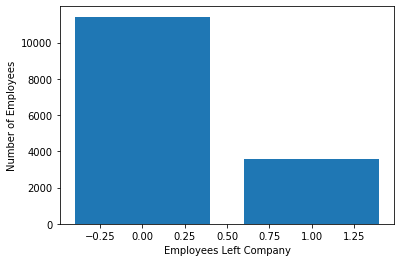

In [8]:
#Data viz of the employee that left the company
empl_left = left.count()
plt.bar(empl_left.index.values, empl_left["satisfaction_level"])
plt.xlabel("Employees Left Company")
plt.ylabel("Number of Employees")
plt.show()

In [9]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

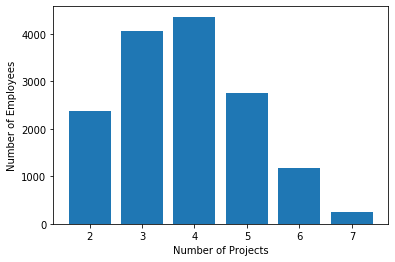

In [10]:
#The number of employee deployed on a certain number of projects 

num_project = data.groupby("number_project").count()
plt.bar(num_project.index.values, num_project["satisfaction_level"])
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")
plt.show()

#### Most employee worked from on 3-5 projects

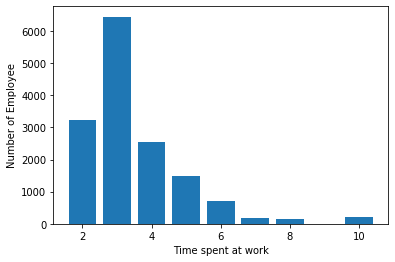

In [11]:
#Number of employees based on their level of experience at work

time_at_work = data.groupby("time_spend_company").count()
plt.bar(time_at_work.index.values, time_at_work["satisfaction_level"])
plt.ylabel("Number of Employee")
plt.xlabel("Time spent at work")
plt.show()

#### Most employee spend 3years at work, while most of other categories stays for 2 & 4 years

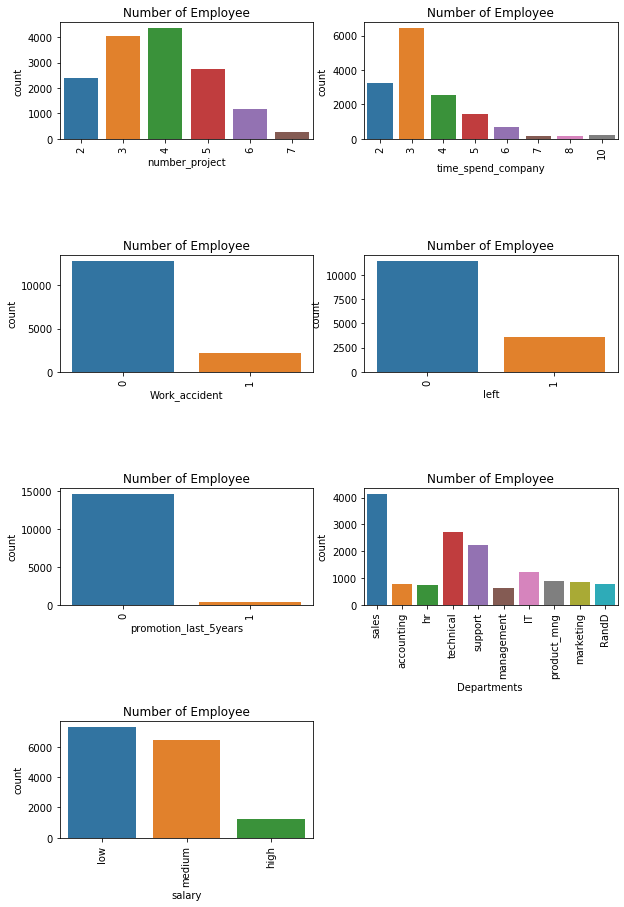

In [12]:
#Features analysis

features = ["number_project", "time_spend_company", "Work_accident", "left", 
            "promotion_last_5years","Departments ", "salary"]
fig = plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data)
    plt.xticks(rotation=90)
    plt.title("Number of Employee")

# Modeling

In [13]:
from sklearn.cluster import KMeans

In [14]:
#filter data
left_employee = data[["satisfaction_level", "last_evaluation"]][data.left == 1]

#Create KMeans clusters and fit
kmeans = KMeans(n_clusters=3, random_state=0).fit(left_employee)

In [15]:
#Create a new column and assign the model's cluster to it
left_employee['label'] = kmeans.labels_

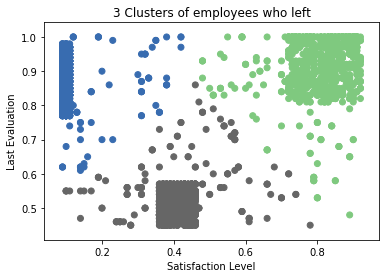

In [16]:
#Create a scatter plot

plt.scatter(left_employee['satisfaction_level'], left_employee['last_evaluation'], c=left_employee['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

# Building a predictive model

In [17]:
from sklearn.preprocessing import LabelEncoder


In [18]:
le = LabelEncoder()

#Convert srings label into strings
data['salary'] = le.fit_transform(data['salary'])
data['Departments '] = le.fit_transform(data['Departments '])

In [19]:
#Split data into test and train
X = data.drop("left", axis=1)
y = data.left

In [20]:
#Train/Test data split
from sklearn.model_selection import train_test_split

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Training

In [21]:
#Import the training model
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
#assign GradientBoostingClassifier to model
model = GradientBoostingClassifier()

#Train model with the train datasets
model.fit(X_train, y_train)

#Predict the response
y_pred = model.predict(X_test)

### Model Evaluation

In [25]:
#import library for evaluation
from sklearn import metrics

print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))
print("Precision Score: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy Score:  0.9715555555555555
Precision Score:  0.958252427184466
Recall:  0.9207089552238806
